In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sympy import *
from sympy.functions.elementary.exponential import exp
import math

#  Question  1 : Visualise the dataset

    Dataset 1 :

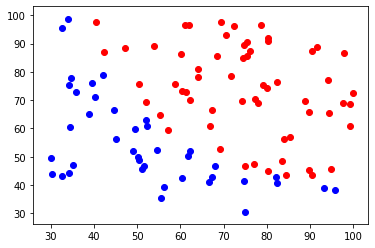

In [164]:
df1 = pd.read_excel('/home/ruchit/Desktop/ML_labs/Lab_3/ex2data1-logistic.xls')
df1[df1.y==1]
pos1 = df1[df1.y==1]
neg1 = df1[df1.y==0]
plt.scatter(pos1.x1, pos1.x2, color='r')
plt.scatter(neg1.x1, neg1.x2, color='b')
plt.show()

    Dataset 2: 

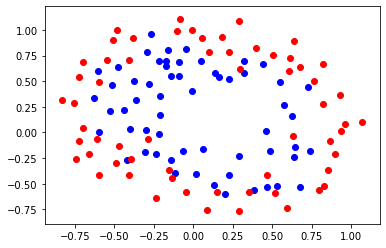

In [165]:
df2 = pd.read_excel('/home/ruchit/Desktop/ML_labs/Lab_3/ex2data2-logistic.xls')
df2[df2.y==1]
pos2 = df2[df2.y==1]
neg2 = df2[df2.y==0]
plt.scatter(pos2.x1, pos2.x2, color='b')
plt.scatter(neg2.x1, neg2.x2, color='r')
plt.show()

# Logistic Regression Classification on dataset 1


In [166]:
def sigmoid(z):
    return 1.0/(1 + np.exp((-1.0)*z))

def hypothesis(x, theta):
    z = np.dot(x, theta)
    return sigmoid(z)

def cost_function(X, Y, theta):
    H = np.c_[hypothesis(X, theta)]
    cost =  -(H*np.log(H)) -(1-H)*np.log(1-H)
    return cost.mean()

def grad_cost(X, Y, theta):
    h = np.c_[hypothesis(X, theta)]
    grad_0 = (h - Y)*np.c_[X[:, 0]]
    grad_1 = (h - Y)*np.c_[X[:, 1]]
    grad_2 = (h - Y)*np.c_[X[:, 2]]
    
    grad_0 = np.sum(grad_0)
    grad_1 = np.sum(grad_1)
    grad_2 = np.sum(grad_2)
    
    return np.array([grad_0, grad_1, grad_2])


### Runing gradient descent on training data, and then plotting the decision boundary

Initial theta(random) : (0.988060033506229, 0.2671181445942199, 0.7146559969060422)
Initial cost function: J(theta) = 0.5532899275297397


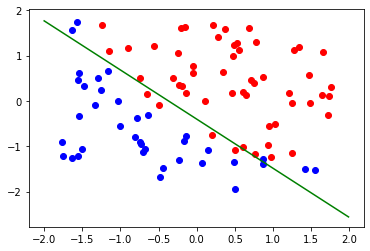

In [167]:
train, test = train_test_split(df1, test_size=0.1)
x0 = np.ones(len(train))
x1_ = np.array(train.x1)
x2_ = np.array(train.x2)
y = np.array(train.y)

x1 = (x1_ - x1_.mean())/x1_.std()
x2 = (x2_ - x2_.mean())/x2_.std()

pos_x1 = []
pos_x2 = []
neg_x1 = []
neg_x2 = []

for i in range(len(train)):
    if(y[i])==1:
        pos_x1.append(x1[i])
        pos_x2.append(x2[i])
    else:
        neg_x1.append(x1[i])
        neg_x2.append(x2[i])
        
pos_x1 = np.array(pos_x1)
pos_x2 = np.array(pos_x2)
neg_x1 = np.array(neg_x1)
neg_x2 = np.array(neg_x2)


X = np.c_[x0,x1,x2]
Y = np.c_[y]
v0,v1,v2 = np.random.rand(3)
theta = np.array([v0,v1,v2])
a=0.01

print("Initial theta(random) : ({}, {}, {})".format(v0,v1,v2))
print("Initial cost function: J(theta) = {}".format(cost_function(X,Y,theta)))

a = 0.01
for i in range(5000):
    theta_n = theta - a*grad_cost(X, Y, theta)
    error = np.linalg.norm(theta_n - theta)
    theta = theta_n
cost_function(X, Y, theta)


x_values = np.arange(-2, 2, 0.01)
y_values =((-x_values*theta[1])-theta[0])/theta[2]
plt.plot(x_values, y_values, color='g')
plt.scatter(pos_x1, pos_x2, color='r')
plt.scatter(neg_x1, neg_x2, color='b')
plt.show()

theta[1] = theta[1]*x1_.std() + x1_.mean()
theta[2] = theta[2]*x2_.std() + x2_.mean()

# Test set results for non linear logistic classifier

### bold red pairs represent the wrongly classified point by hypothesis function

In [168]:
from termcolor import colored
x1_test = np.array(test.x1)
x2_test = np.array(test.x2)
y_test = np.array(test.y)

x0_test = np.ones(10)

x1_test = (x1_test - x1_test.mean())/x1_test.std()
x2_test = (x2_test - x2_test.mean())/x2_test.std()



X_test = np.c_[x0_test, x1_test, x2_test]
test_res = np.c_[hypothesis(X_test, theta)>0.5, y_test]

n=0
for pair in test_res:
    ans = str(pair[0]) + " " + str(pair[1])
    if(pair[0]==pair[1]):
        print(colored(ans, 'green'))
        n+=1
    else:
        print('\033[1m' + colored(ans, 'red')) #'\033[1m' is added to print bold 
print("Test set accuracy = {}".format(n/len(test)))

0 1
0 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
1 1
Test set accuracy = 0.8


# Logistic regression classification on Dataset 2:
## Non linear decision boundary

In [169]:
def grad_cost_nl(X, Y, theta):
    h = np.c_[hypothesis(X, theta)]
    grad_0 = (h - Y)*np.c_[X[:, 0]]
    grad_1 = (h - Y)*np.c_[X[:, 1]]
    grad_2 = (h - Y)*np.c_[X[:, 2]]
    grad_3 = (h - Y)*np.c_[X[:, 3]]
    grad_4 = (h - Y)*np.c_[X[:, 4]]
    grad_5 = (h - Y)*np.c_[X[:, 5]]
    
    
    grad_0 = np.sum(grad_0)
    grad_1 = np.sum(grad_1)
    grad_2 = np.sum(grad_2)
    grad_3 = np.sum(grad_3)
    grad_4 = np.sum(grad_4)
    grad_5 = np.sum(grad_5)
    
    
    return np.array([grad_0, grad_1, grad_2, grad_3, grad_4, grad_5])

In [170]:
train, test = train_test_split(df2, test_size=0.1)
x1 = np.array(train.x1)
x2 = np.array(train.x2)
x1s = x1**2
x2s = x2**2
x1x2 = x1*x2
x0 = np.ones(len(x1))
y = np.array(train.y)

X = np.c_[x0, x1, x2, x1s, x1x2, x2s]
Y = np.c_[np.array(train.y)]

In [171]:
v0,v1,v2,v3,v4,v5 = np.random.rand(6)
theta = np.array([v0,v1,v2,v3,v4,v5])
a=0.01

print("Initial theta(random) : ({}, {}, {}, {}, {}, {})".format(v0,v1,v2,v3,v4,v5))
print("Initial cost function: J(theta) = {}".format(cost_function(X,Y,theta)))

a = 0.01
for i in range(5000):
    theta_n = theta - a*grad_cost_nl(X, Y, theta)
    error = np.linalg.norm(theta_n - theta)
    theta = theta_n
cost_function(X, Y, theta)



Initial theta(random) : (0.5632891501604592, 0.9295581229899941, 0.3038085040702543, 0.4363962398308445, 0.6879458863007966, 0.5134369858971921)
Initial cost function: J(theta) = 0.5809531118709209


0.33690467968835475

In [172]:
theta

array([  5.16273805,   3.80888525,   4.29351862, -12.62772753,
        -9.00777609, -12.25041787])

In [173]:
from sympy.solvers import solve
theta0 = Symbol('theta0')
theta1 = Symbol('theta1')
theta2 = Symbol('theta2')
theta3 = Symbol('theta3')
theta4 = Symbol('theta4')
theta5 = Symbol('theta5')

x1_ = Symbol('x1')
x2_ = Symbol('x2')

f = theta0 + theta1*x1_ + theta2*x2_ + theta3*x1_**2 + theta4*x1_*x2_ + theta5*x2_**2
x_vals = np.arange(-2,2.1,0.01)
dic = {theta0:theta[0], theta1:theta[1], theta2:theta[2], theta3:theta[3], theta4:theta[4], theta5:theta[5]}
f1 = f.subs(dic)

# Test set results for non linear logistic classifier

### bold red pairs represent the wrongly classified point by hypothesis function

In [174]:
from termcolor import colored
x1_test = np.array(test.x1)
x2_test = np.array(test.x2)
x1s_test = x1_test**2
x2s_test = x1_test**2
x1x2_test = x1_test*x2_test
y_test = np.array(test.y)
x0_test = np.ones(len(x1_test))

X_test = np.c_[x0_test, x1_test, x2_test, x1s_test, x1x2_test, x2s_test]
test_res = np.c_[hypothesis(X_test, theta)>0.5, y_test]

n=0
for pair in test_res:
    ans = str(pair[0]) + " " + str(pair[1])
    if(pair[0]==pair[1]):
        print(colored(ans, 'green'))
        n+=1
    else:
        print('\033[1m' + colored(ans, 'red')) #'\033[1m' is added to print bold 
print("Test set accuracy = {}".format(n/len(test)))


1 1
0 0
0 0
1 1
1 0
0 0
1 1
0 1
1 1
1 1
0 1
1 1
Test set accuracy = 0.75
